<a href="https://colab.research.google.com/github/umeshrawat/AI_Math_Vedas/blob/master/BERT_Examples_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to BERT

   BERT(Bidirectional Encoder Representations from Transformers) is based on Transformers, a deep learning model in which every output element is connected to every input element, and the weightings between them are dynamically calculated based upon their connection.

It is designed to pre-train deep bidirectional representations from an unlabeled text by jointly conditioning on both the left and right contexts. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks.

Implementing the pretrained BERT model for the following tasks-
1. Text Summarization
2. Question-Answering system

In [ ]:
# mounting the drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# To get the present working directory
# pwd

In [ ]:
# To reach the directory where this notebook exists
# cd  drive/MyDrive/Colab Notebooks

In [ ]:
# Installing the required libraries.
# bert-extractive-summarizer library will be helpful in summarizing the text.
!pip install bert-extractive-summarizer torch

# BERT for Text Summarization
BERT conveys the core information of original text through the shortest text possible. Note that here, the sentences, in summary, are generated by the model, not just extracted from the original text data.

**We have installed all the required libraries and now we will see how BERT summarizes the text.**







In [ ]:
# Importing the library
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
#1.
#load the model
bert_model = Summarizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#2.
# function to generate and print the summary out of the original text. Here Parameters-
# Model- BERT model to generate summary
# Text- Original text out of which summary will be generated
# min_length- denotes the minimum length of the summary
# num_sentences- denotes the number of sentences that will be present in summary

def gen_text_summary(Model, Text, min_length = 60, num_sentences = 1):

  bert_summary = bert_model(text, min_length = min_length, num_sentences = num_sentences)
  print(bert_summary)


In [ ]:
# initializing the original text
text = '''
           Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interaction between computers and humans in natural language. The ultimate goal of NLP is to help computers understand language as well as we do.
           It is the driving force behind things like virtual assistants, speech recognition, sentiment analysis, automatic text summarization, machine translation and much more. Natural language processing (NLP) is the ability of a computer program to understand human language as it is spoken and written -- referred to as natural language.
           It is a component of artificial intelligence (AI). NLP has existed for more than 50 years and has roots in the field of linguistics. It has a variety of real-world applications in a number of fields, including medical research, search engines and business intelligence.
           Human language is special for several reasons. It is specifically constructed to convey the speaker/writer's meaning. It is a complex system, although little children can learn it pretty quickly.
           Another remarkable thing about human language is that it is all about symbols. According to Chris Manning, a machine learning professor at Stanford, it is a discrete, symbolic, categorical signaling system. This means we can convey the same meaning in different ways (i.e., speech, gesture, signs, etc.)
           The encoding by the human brain is a continuous pattern of activation by which the symbols are transmitted via continuous signals of sound and vision.
           Understanding human language is considered a difficult task due to its complexity. For example, there are an infinite number of different ways to arrange words in a sentence.
           Also, words can have several meanings and contextual information is necessary to correctly interpret sentences. Every language is more or less unique and ambiguous. Just take a look at the following newspaper headline “The Pope’s baby steps on gays.” This sentence clearly has two very different interpretations, which is a pretty good example of the challenges in natural language processing.

        '''

In [ ]:
# function call
gen_text_summary(bert_model, text, min_length = 60, num_sentences = 3)

Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interaction between computers and humans in natural language. Another remarkable thing about human language is that it is all about symbols. This sentence clearly has two very different interpretations, which is a pretty good example of the challenges in natural language processing.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# function call
gen_text_summary(bert_model, text, min_length = 60, num_sentences = 1)

Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interaction between computers and humans in natural language.


# **BERT for Question Answering Task**
Here input to the BERT model will be Question and Paragraph. BERT has to extract the answer of the given Question from the paragraph.  The input embeddings are the sum of the token embeddings and the segment embeddings.

**Token embeddings**: A [CLS] token is added to the input word tokens at the beginning of the question and a [SEP] token is inserted at the end of both the question and the paragraph.

**Segment embeddings:** A marker indicating Sentence A or Sentence B is added to each token. This allows the model to distinguish between sentences. In the below diagram, all tokens marked as A belong to the question, and those marked as B belong to the paragraph.
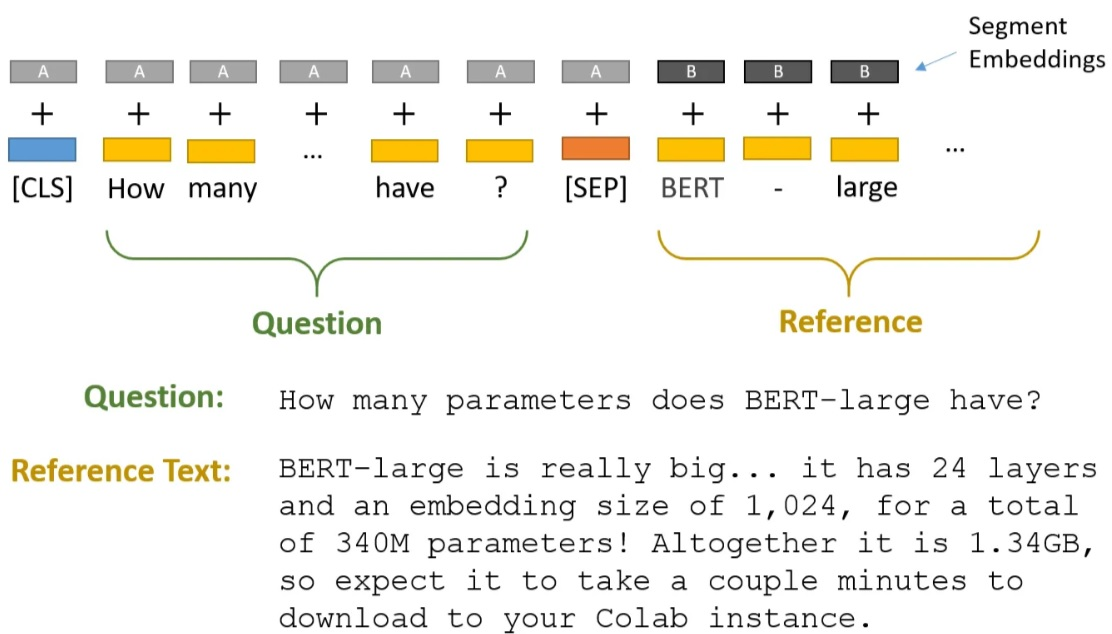

Reference taken from https://medium.com/analytics-vidhya/question-answering-system-with-bert-ebe1130f8def

In [ ]:
# installing all the required libraries for Question Answering task.
!pip install transformers
#!pip install --upgrade transformers
!pip install spacy

In [ ]:
# 3.
# importing the libraries
from transformers import BertForQuestionAnswering, BertTokenizer

In [ ]:
import torch

**Model 'bert-large-uncased-whole-word-masking-finetuned-squad' description-**
Pretrained model on English language using a masked language modeling (MLM) objective. This model is uncased: it does not make a difference between english and English.

Differently to other BERT models, this model was trained with a new technique: Whole Word Masking. In this case, all of the tokens corresponding to a word are masked at once. The overall masking rate remains the same. Each masked WordPiece token is predicted independently.

After pre-training, this model was fine-tuned on the SQuAD dataset.

This model has following configuration-

*  24-layer
*  1024 hidden dimension
*  16 attention heads
*  336M parameters.











In [ ]:
#4.
# loading the model bert-large-uncased-whole-word-masking-finetuned-squad
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#5.
# loading the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# 6.
# This function will be helpful in finding the Answer to the given question from the given paragraph.
def bert_ans_questions_from_text(Model, Tokenizer, Text, Question):
# use function encode_plus() to encode the sequence. The function encode_plus() returns a dictionary that contains input_ids, token_type_ids, and attention mask but
# we only need input_ids and token_type_ids for the QA task.
  encoding = Tokenizer.encode_plus(text=Question,text_pair=Text)
  inputs = encoding['input_ids']  #Token embeddings
  sentence_embedding = encoding['token_type_ids']  #Segment embeddings
  tokens = Tokenizer.convert_ids_to_tokens(inputs) #input tokens

  start_scores, end_scores = Model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]), return_dict=False) # Pass the parameters as token embeddings, Segment embeddings in the loaded model.

  start_index = torch.argmax(start_scores) # To get the start index of answer

  end_index = torch.argmax(end_scores)# To get the end index of the answer

  answer = tokens[start_index:end_index+1] # Finding the answer from the given paragraph using start and end index.

# recover any words that were broken down into subwords and then finally storing the correct answer in corrected_answer
  corrected_answer = ''

  for word in answer:

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

  print(corrected_answer)

In [ ]:
# initializing the question and paragraph variable
question = '''What is Machine Learning?'''
paragraph = ''' Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance
                on a specific task. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or
                decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection
                of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning
                is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods,
                theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory
                data analysis through unsupervised learning.In its application across business problems, machine learning is also referred to as predictive analytics. '''

In [ ]:
# function call with parameters Model, tokenizer for converting text into tokens, paragraph and question. This will return the answer to the given question from the paragraph.
bert_ans_questions_from_text(Model = model, Tokenizer = tokenizer, Text = paragraph, Question = question)

 the scientific study of algorithms and statistical models
